# Central Limit Theorem experiment (2)
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

### (1) Run mean calculation for uniform distributed numbers

In [4]:
# Considered random number distribution:
# Exponential distribution scaled and shifted in such a way that
#    mean=0 and standard deviation=sqrt(Nmean)

def myGen(Nmean):
    Eval = np.sqrt(Nmean)          # Assumed variance for exponential distribution
    x_tab = np.random.exponential(scale=Eval,size=Nmean)
    return x_tab-Eval              # Shift to zero mean

In [9]:
# Number of measurements to average

Nmean = 1

# Number of experiments

Ntry = 1000
    
# Array to store experiment results

mean_tab = np.empty(Ntry,dtype=float)

# Main experiment loop:

for itry in range(Ntry):
    x_tab = myGen(Nmean)
    mean_tab[itry]=np.mean(x_tab)

### (3) Plot results

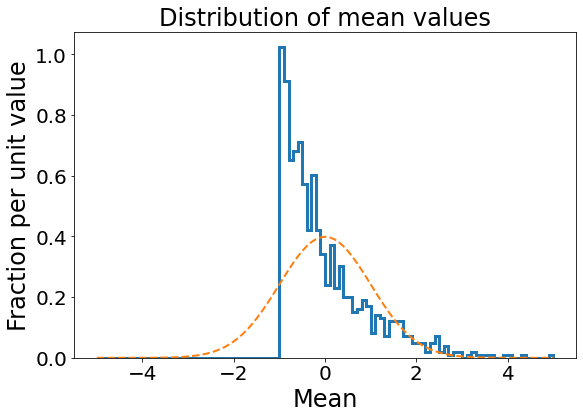

In [10]:
# Range for result histogram

Xmax=5.
Nbin = 100

# Plot histogram

plt.figure(figsize=(9, 6))

plt.hist(mean_tab,bins=Nbin, range=[-Xmax,Xmax], density=True, log=False, histtype='step',linewidth=3)

plt.xlabel('Mean',size=24)
plt.ylabel('Fraction per unit value',size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Distribution of mean values",size=24)

# Expected dependence

def myGauss(x):
    norm = 1/np.sqrt(2 * np.pi)
    val = np.exp( -0.5 * x**2)
    return norm*val

x_tab = np.linspace(-Xmax,Xmax,Nbin+1)
y_tab = myGauss(x_tab)
plt.plot(x_tab,y_tab,'--',linewidth=2)

fname = '04_central_limit2_'+str(Nmean)+'.png'
plt.savefig(fname)

plt.show()